In [1]:
#SVM panel for Figure 3B, modified 2022_01_27

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import os

In [2]:
import sys
sys.path.append('/Users/yzhiyuan/workspace/DENV_10X/notebook/') # go to parent dir
import lib.util
from lib.util import *

In [3]:
#load cell abundance data

dfpath = '/Users/yzhiyuan/workspace/DENV_10X/tables/2021_10_08/cell_abundance.tsv'
df = pd.read_csv(dfpath, index_col = 0, sep = '\t')

In [4]:
df

,naive B cells,memory B cells,activated B cells,Condition,XCL_low NK cells,XCL_high NK cells,CD4+ T cells,CD8+ effector T cells,CD8+ naive/memory T cells,macrophages,non_classical monocytes,classical monocytes,non_cycling Plasmablasts,cycling Plasmablasts,Condition_2
1_019_01,0.910828,0.060510,0.028662,infect,0.979421,0.020579,0.805016,0.096278,0.098706,0.039801,0.547264,0.412935,0.804124,0.195876,dengue
3_012_01,0.875855,0.068426,0.055718,Healthy,0.977148,0.022852,0.724036,0.094955,0.181009,0.006410,0.416667,0.576923,0.869048,0.130952,Healthy
3_037_01,0.750000,0.171378,0.078622,Healthy,0.961165,0.038835,0.553046,0.051335,0.395619,0.002299,0.005747,0.991954,0.753731,0.246269,Healthy
6_023_01,0.519126,0.058288,0.422587,infect,0.933718,0.066282,0.307102,0.556622,0.136276,0.079505,0.063604,0.856890,0.965960,0.034040,dengue
3_047_01,0.789104,0.112917,0.097979,Healthy,0.871581,0.128419,0.609804,0.196078,0.194118,0.000000,0.620690,0.379310,1.000000,0.000000,Healthy
3_074_01,0.885132,0.065771,0.049097,Healthy,0.906726,0.093274,0.673981,0.152038,0.173981,0.071429,0.821429,0.107143,0.866667,0.133333,Healthy
5_030_01,0.693023,0.135814,0.171163,infect,0.887781,0.112219,0.520920,0.379947,0.099133,0.057895,0.051128,0.890977,0.459596,0.540404,s_dengue
5_193_01,0.791444,0.048128,0.160428,infect,0.909722,0.090278,0.574686,0.181300,0.244014,0.084548,0.020408,0.895044,0.692308,0.307692,s_dengue
5_154_01,0.907360,0.064086,0.028553,infect,0.915832,0.084168,0.687931,0.131034,0.181034,0.205479,0.456621,0.337900,0.772059,0.227941,dengue
6_001_01,0.852305,0.083573,0.064121,infect,0.917309,0.082691,0.694915,0.123941,0.181144,0.081395,0.230233,0.688372,0.812283,0.187717,dengue


In [9]:
def SVM(df, celltype_list, train_list, vali_list, savepath, filename):
    rcParams['figure.figsize']=(7,7)
    rcParams['font.size']= 20
    rcParams['pdf.fonttype'] = 42
    rcParams['font.sans-serif'] = "Arial"
       
    #spliting train and validation dataset
    df_2 = df.loc[df.Condition_2 != 'Healthy', celltype_list]
    df_2['Condition_3'] = False
    df_2.loc[df_2.Condition_2 == 's_dengue', 'Condition_3'] = True
    
    train_df = df_2.iloc[train_list]
    train_m = train_df.iloc[:,0:2].values
    train_label = train_df['Condition_3'].to_list()


    vali_df = df_2.iloc[vali_list]
    vali_m = vali_df.iloc[:,0:2].values
    vali_label = vali_df['Condition_3'].to_list()
    
    #fit model
    X = train_m
    Y = train_label

    clf = svm.NuSVC(kernel='poly', degree = 2, gamma='scale')
    clf.fit(X, Y)
    
    #visualize the decision function and the validation dataset
    xx, yy = np.meshgrid(np.linspace(0, 0.6, 300),
                     np.linspace(0, 0.6, 300))
    test_sample = np.c_[xx.ravel(), yy.ravel()]

    Z_2 = clf.decision_function(test_sample)
    Z_2 = Z_2.reshape(xx.shape)
    
    plt.imshow(Z_2, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z_2, levels=[0], linewidths=2,
                       linestyles='dashed')
#this is for the validation dataset visualization    
#     plt.scatter(vali_m[:,0], vali_m[:,1], s=30, c=vali_label, cmap=plt.cm.Paired,
#             edgecolors='k')


#this is for the total dataset visualization 

    plt.scatter(df_2.iloc[:,0:2].values[:,0], df_2.iloc[:,0:2].values[:,1], s=30, 
               c=df_2.Condition_3, cmap=plt.cm.Paired, edgecolors='k')



    plt.xlabel(celltype_list[0])
    plt.ylabel(celltype_list[1])
    
    plt.savefig(os.path.join(savepath, filename))
#     plt.close()
    
    

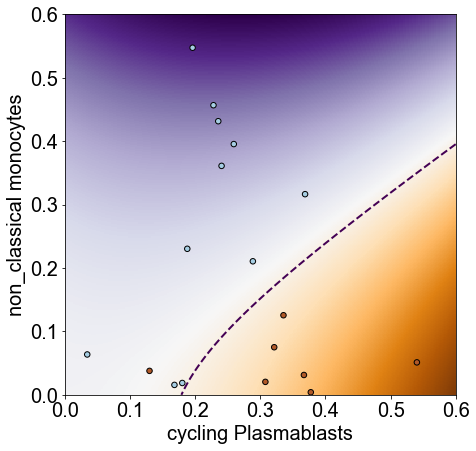

In [10]:
# representative figure for leave one out strategy SVM
train_id = np.append(np.arange(1,16), 17)
vali_id = np.array([1])
savepath = '/Users/yzhiyuan/workspace/DENV_10X/figures/Manuscript/raw_figure_V3'
filename = 'svm_2d_total.pdf'
SVM(df, ['cycling Plasmablasts', 'non_classical monocytes', 'Condition_2'], train_id, vali_id, savepath, filename)

# filename_2 = 'svm_2d_total_2.pdf'
# SVM(df, ['non_classical monocytes', 'XCL_high NK cells', 'Condition_2'], train_id, vali_id, savepath, filename_2)




In [11]:
def robust_SVM(df,number):
    temp_list = []
    for ID in df.index:
        train_df = df.loc[df.index != ID]
        train_m = train_df.iloc[:,0:number].values
        train_label = train_df['Condition_3'].to_list()
        
        X = train_m
        Y = train_label
        clf = svm.NuSVC(kernel='poly', degree = 2, gamma='scale')
        clf.fit(X, Y)
        
        
        Z_3 = clf.decision_function(df.loc[df.index == ID].iloc[:,0:number].values)
        temp_list.append((Z_3>0) == df.loc[ID, 'Condition_3'])
        
        array = np.array(temp_list).ravel()
        
        
    return(array)
        
        

In [17]:
#leave one out robustness for non_classical monocytes and cycling Plasmablasts

df_2 = df.loc[df.Condition_2 != 'Healthy', ['non_classical monocytes', 'cycling Plasmablasts',
                                            'Condition_2']]
df_2['Condition_3'] = False
df_2.loc[df_2.Condition_2 == 's_dengue', 'Condition_3'] = True


test = robust_SVM(df_2,2)

print('leave one out robustness: {} / {}'.format(test.sum(), len(df_2.index)))

leave one out robustness: 17 / 18


In [18]:
#leave one out robustness for XCL_high NK cells and cycling Plasmablasts

df_2 = df.loc[df.Condition_2 != 'Healthy', ['XCL_high NK cells', 'cycling Plasmablasts',
                                            'Condition_2']]
df_2['Condition_3'] = False
df_2.loc[df_2.Condition_2 == 's_dengue', 'Condition_3'] = True


test = robust_SVM(df_2,2)

print('leave one out robustness: {} / {}'.format(test.sum(), len(df_2.index)))

leave one out robustness: 14 / 18


In [20]:
#leave one out robustness for XCL_high NK cells and non_classical monocytes

df_2 = df.loc[df.Condition_2 != 'Healthy', ['non_classical monocytes', 'XCL_high NK cells',
                                            'Condition_2']]
df_2['Condition_3'] = False
df_2.loc[df_2.Condition_2 == 's_dengue', 'Condition_3'] = True


test = robust_SVM(df_2,2)

print('leave one out robustness: {} / {}'.format(test.sum(), len(df_2.index)))

leave one out robustness: 13 / 18


In [21]:
#leave one out robustness for all three cell subtype

df_2 = df.loc[df.Condition_2 != 'Healthy', ['non_classical monocytes', 'cycling Plasmablasts','XCL_high NK cells',
                                            'Condition_2']]
df_2['Condition_3'] = False
df_2.loc[df_2.Condition_2 == 's_dengue', 'Condition_3'] = True


test = robust_SVM(df_2,3)

print('leave one out robustness: {} / {}'.format(test.sum(), len(df_2.index)))

leave one out robustness: 16 / 18


In [247]:
#PCA for all cell abundance data
from sklearn.decomposition import PCA
def pca(df):
    X = df.drop(['Condition', 'Condition_2'], axis = 1).values
    pca = PCA(n_components=2)
    pca.fit(X)
    pc = pca.fit_transform(X)
    df_pca = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2'])
    df_pca['Condition_2'] = df.Condition_2.to_list()
    df_pca.loc[((df_pca.Condition_2 == 'DWS') | (df_pca.Condition_2 == 'dengue')), 'Condition_2'] = 'dengue/DWS'
    
    var = pca.explained_variance_ratio_
    
    return(df_pca, var)

def pca_plot(df_pca, path, filename):
    rcParams['figure.figsize']=(7,7)
    rcParams['font.size']= 20
    rcParams['pdf.fonttype'] = 42
    rcParams['font.sans-serif'] = "Arial"
    
    fig, ax = plt.subplots()
    
    sb.scatterplot(x = df_pca['PC1'], y = df_pca['PC2'], hue = df_pca.Condition_2, s = 150, ax = ax)
    
    ax.set_xlabel('PC1 (53% variance)')
    ax.set_ylabel('PC2 (22% variance)')
    ax.legend(bbox_to_anchor =(1,1), frameon = False)
    
    savepath = os.path.join(path, filename)   
    fig.savefig(savepath, bbox_inches = 'tight')

    

In [225]:
temp = df.loc[df.Condition_2 != 'Healthy'].copy()

df_pca, var = pca(temp)

In [226]:
#Variance ratio for first to PCs
var

array([0.52918489, 0.22320152])

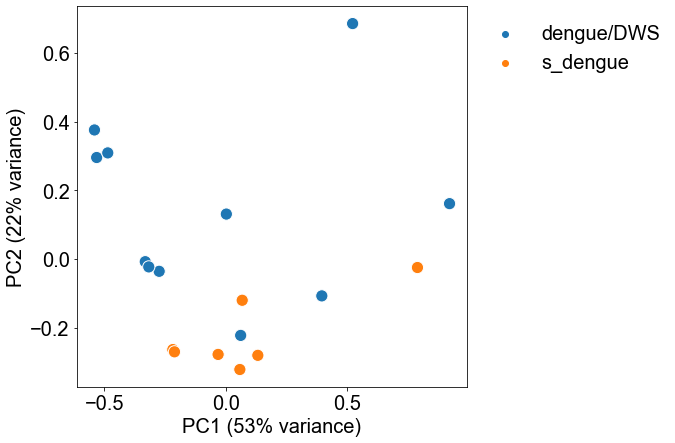

In [248]:
savepath = '/Users/yzhiyuan/workspace/DENV_10X/figures/Manuscript/raw_figure_V3'
filename = 'pca_total.pdf'

pca_plot(df_pca, savepath, filename)

In [244]:
df_pca

,PC1,PC2,Condition_2
0,-0.532220,0.295374,dengue/DWS
1,0.395133,-0.107502,dengue/DWS
2,0.057536,-0.321866,s_dengue
3,-0.032024,-0.277977,s_dengue
4,-0.486470,0.308829,dengue/DWS
5,-0.274792,-0.035950,dengue/DWS
6,-0.218461,-0.263804,s_dengue
7,-0.211695,-0.270361,s_dengue
8,0.131555,-0.280590,s_dengue
9,0.067254,-0.120273,s_dengue
